HERE THE UNTREATED SEARCH GRID DATA IS HANDLED

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
import os
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

In [3]:
epi_ec_baseline_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"epi_data\results_run_2_extended\0\base_line")
epi_ar_eo_baseline_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"epi_data\results_run_2_extended\1\base_line")

In [4]:
epi_ec_baseline_results = np.zeros(
    (   
        16,
        5
    )
)

In [5]:
epi_eo_baseline_results = np.zeros(
    (   
        16,
        5
    )
)

In [6]:
for i, pth in enumerate(epi_ec_baseline_folder.iterdir()):
    current = np.load(pth)
    epi_ec_baseline_results[i, :] = current.copy()

In [7]:
for i, pth in enumerate(epi_ar_eo_baseline_folder.iterdir()):
    current = np.load(pth)
    epi_eo_baseline_results[i, :] = current.copy()

In [8]:
epi_baseline_results = epi_ec_baseline_results.__add__(epi_eo_baseline_results)/2

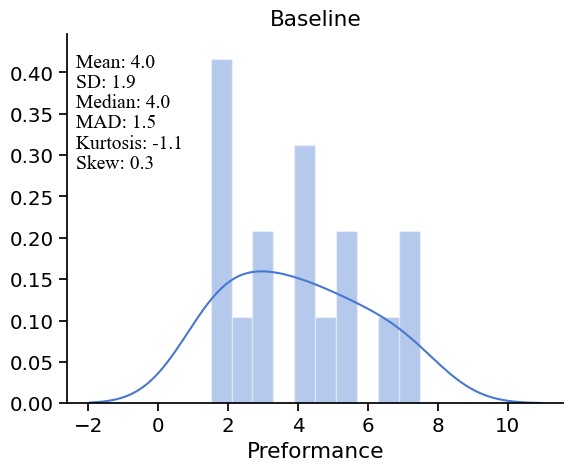

In [9]:
plot_dist_hist(epi_baseline_results[:, 1], 'Baseline', 'Preformance')

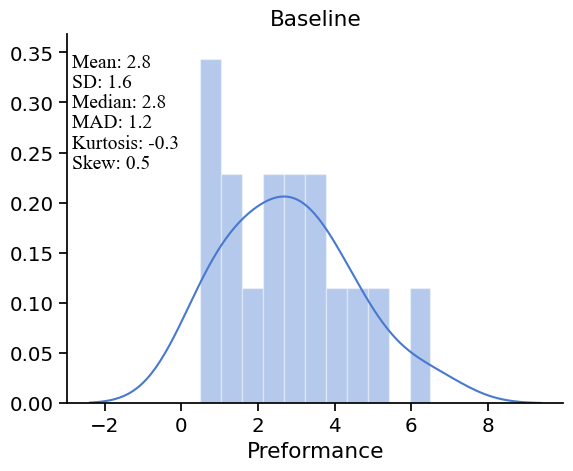

In [10]:
plot_dist_hist(epi_baseline_results[:, 2]-epi_baseline_results[:, 1], 'Baseline', 'Preformance')

In [11]:
wang_baseline_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"yulin_wang\results_run_2\0\base_line")
wang_baseline_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"yulin_wang\results_run_2\1\base_line")

In [12]:
wang_baseline_ec_results = np.zeros(
    (   
        16,
        5
    )
)

In [13]:
wang_baseline_eo_results = np.zeros(
    (   
        16,
        5
    )
)

In [14]:
for i, pth in enumerate(wang_baseline_ec_folder.iterdir()):
    current = np.load(pth)
    wang_baseline_ec_results[i, :] = current.copy()

In [15]:
for i, pth in enumerate(wang_baseline_eo_folder.iterdir()):
    current = np.load(pth)
    wang_baseline_eo_results[i, :] = current.copy()

In [16]:
wang_baseline_results = wang_baseline_ec_results.__add__(wang_baseline_eo_results)/2

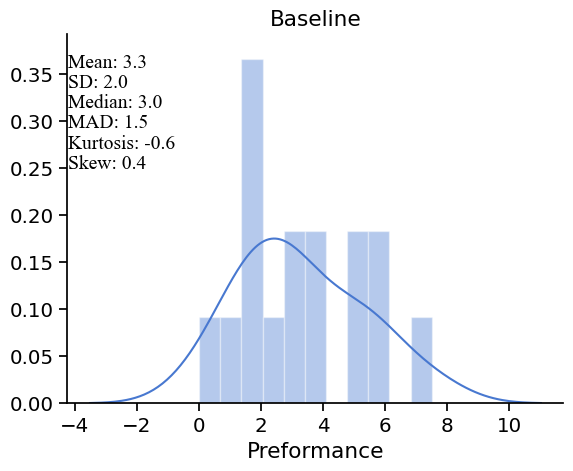

In [17]:
plot_dist_hist(wang_baseline_results[:, 1], 'Baseline', 'Preformance')

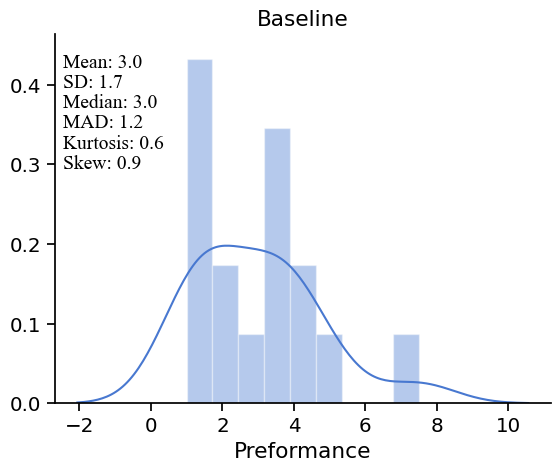

In [18]:
plot_dist_hist(wang_baseline_results[:, 2]-wang_baseline_results[:, 1], 'Baseline', 'Preformance')

In [19]:
srm_baseline_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"srm_data\results_run_2_extended\base_line")

In [20]:
srm_baseline_results = np.zeros(
    (   
        16,
        5
    )
)

In [21]:
for i, pth in enumerate(srm_baseline_folder.iterdir()):
    current = np.load(pth)
    srm_baseline_results[i, :] = current.copy()

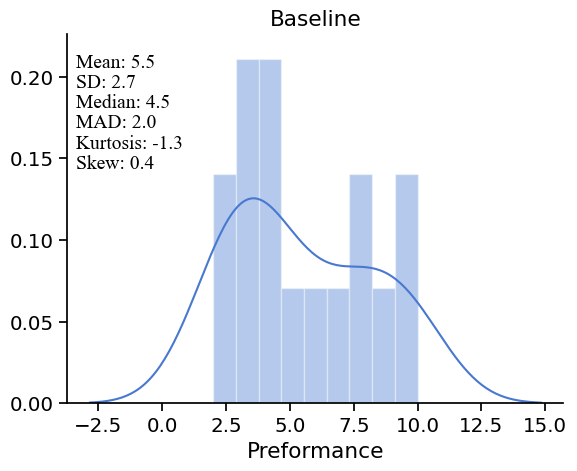

In [22]:
plot_dist_hist(srm_baseline_results[:, 1], 'Baseline', 'Preformance')

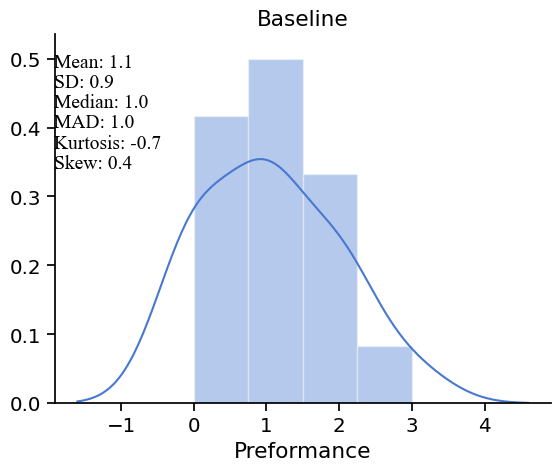

In [23]:
plot_dist_hist(srm_baseline_results[:, 2]-srm_baseline_results[:, 1], 'Baseline', 'Preformance')

In [24]:
spis_baseline_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"SPIS-Resting-State-Dataset\results_run_2_extended\base_line")

In [25]:
spis_baseline_alternate_results = np.zeros(
    (   
        8,
        5
    )
)

In [26]:
count=0
for i, pth in enumerate(spis_baseline_folder.iterdir()):
    current = np.load(pth)
    spis_baseline_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [27]:
spis_baseline_alternate_results /= 2

In [28]:
spis_baseline_results = np.zeros(
    (   
        16,
        5
    )
)

In [29]:
for i, pth in enumerate(spis_baseline_folder.iterdir()):
    current = np.load(pth)
    spis_baseline_results[i, :] = current.copy()

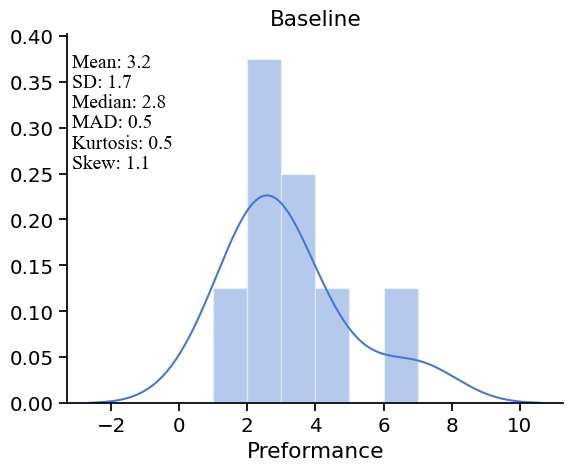

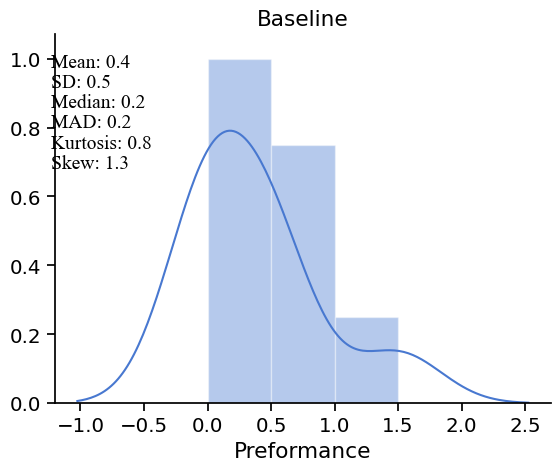

In [30]:
plot_dist_hist(spis_baseline_alternate_results[:, 1], 'Baseline', 'Preformance')
plot_dist_hist(spis_baseline_alternate_results[:, 2]-spis_baseline_alternate_results[:, 1], 'Baseline', 'Preformance')

In [31]:
baseline_results = np.zeros(
    (   
        64,
        5
    )
)

In [32]:
baseline_results_alternate = np.zeros(
    (   
        56,
        5
    )
)

In [33]:
baseline_results[0:16, :] = epi_baseline_results
baseline_results[16:32, :] = srm_baseline_results
baseline_results[32:48, :] = spis_baseline_results
baseline_results[48:64, :] = wang_baseline_results

In [34]:
baseline_results_alternate[0:16, :] = epi_baseline_results
baseline_results_alternate[16:32, :] = srm_baseline_results
baseline_results_alternate[32:40, :] = spis_baseline_alternate_results
baseline_results_alternate[40:56, :] = wang_baseline_results

In [35]:
baseline_results[:, 2] -= baseline_results[:, 1]

In [36]:
baseline_results_alternate[:, 2] -= baseline_results_alternate[:, 1]

In [36]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"baseline_results" ,baseline_results)

In [37]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"baseline_results_alternate" ,baseline_results_alternate)

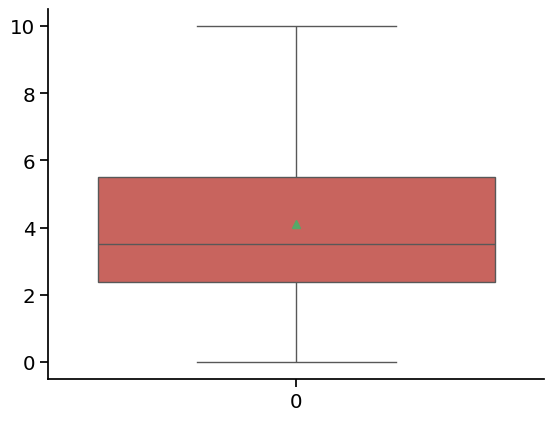

In [38]:
plot_n_boxplots([baseline_results_alternate[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

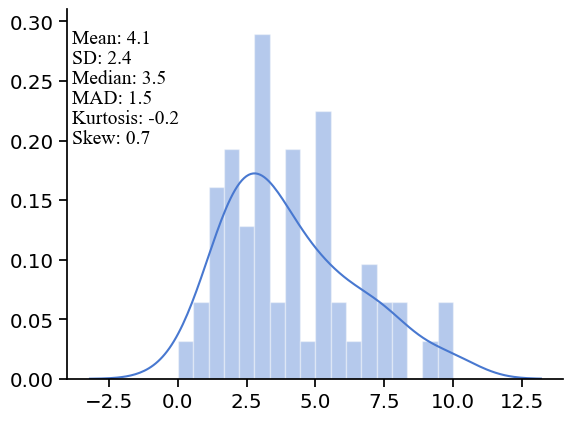

In [40]:
plot_dist_hist(baseline_results_alternate[:, 1].flatten())
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"grid_brain_baseline")

In [41]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"linear_reg_1\base_line", baseline_results_alternate[:, 1].flatten())

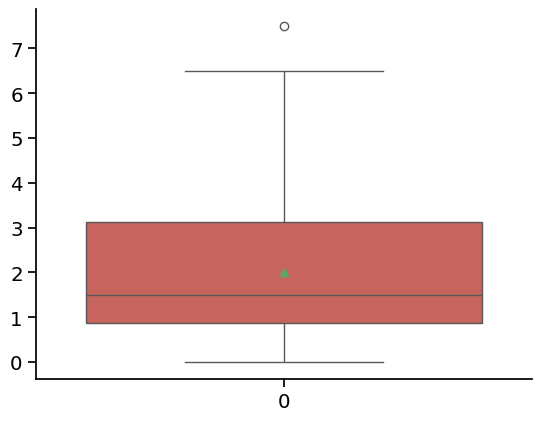

In [42]:
plot_n_boxplots([baseline_results_alternate[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

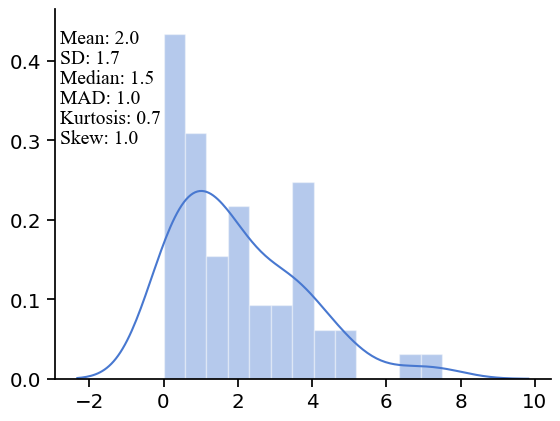

In [43]:
plot_dist_hist(baseline_results_alternate[:, 2].flatten())
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"grid_artefact_baseline")

In [44]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())) / "results_vault" / r"linear_reg_1_art\base_line", baseline_results_alternate[:, 2].flatten())